### <font color='blue'>Context</font>

**Diabetes** is one of the fastest growing life-threatening chronic diseases and has already affected 422 million people worldwide according to the World Health Organization (WHO) report in 2018. a relatively long asymptomatic phase, early detection of diabetes is always desired for a clinically meaningful outcome. Around 50% of all people suffering from diabetes go undiagnosed due to its long-term asymptomatic phase.

This dataset contains 520 observations with 17 characteristics, collected using direct questionnaires and diagnostic results from patients at Sylhet Diabetes Hospital in Sylhet, Bangladesh.


### <font color='blue'>Objective of Analysis</font>


* **Create a classification model to predict diabetes.**

* **Explore the most common features associated with diabetic risk.**


### <font color='blue'>Description of Predictive Variables</font>

* **Polyuria** - If the patient is having an excessive volume of urine
or not.

* **Polydipsia** - Whether the patient is experiencing excessive thirst or not.

* **Perda_peso_repentina**- If the patient had an episode of sudden weight loss or not.

* **Weakness**- If the patient has had an episode of feeling weak.

* **Polyphagia**- Whether the patient had an episode of excessive/extreme hunger or not.

* **candidiasis_genital**- Whether the patient had a yeast infection or not.

* **visual_blur**- If the patient had an episode of blurred vision.

* **itching**- If the patient has had an episode of excessive itching.

* **irritability**- If the patient had an episode of irritability.

* **delayed_healing**- If the patient had a late healing noted when injured.

* **partial_paresis**- Whether the patient has had an episode of weakening of a muscle/group of muscles or not.

* **muscle stiffness**- If the patient has had an episode of muscle stiffness.

* **baldness**- If the patient had hair loss or not.

* **obesity**- Whether the patient can be considered obese or not using their body mass index.

* **Result** - whether the patient was diagnosed with diabetes or not, *1* corresponds to *YES* and 0 corresponds to *NO*.

### <font color='blue'> Importing the libraries that will be used in the analysis </font>

In [1]:
import numpy as np
import pandas as pd
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

loading the data

In [2]:
df=pd.read_excel('diabete.xlsx')

In [3]:
df.head(10)

,id,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade,Resultado
0,1,40,Masculino,Nao,Sim,Nao,Sim,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Sim,1
1,2,58,Masculino,Nao,Nao,Nao,Sim,Nao,Nao,Sim,Nao,Nao,Nao,Sim,Nao,Sim,Nao,1
2,3,41,Masculino,Sim,Nao,Nao,Sim,Sim,Nao,Nao,Sim,Nao,Sim,Nao,Sim,Sim,Nao,1
3,4,45,Masculino,Nao,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Nao,Sim,Nao,Nao,Nao,Nao,1
4,5,60,Masculino,Sim,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,1
5,6,55,Masculino,Sim,Sim,Nao,Sim,Sim,Nao,Sim,Sim,Nao,Sim,Nao,Sim,Sim,Sim,1
6,7,57,Masculino,Sim,Sim,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,Nao,Nao,Nao,1
7,8,66,Masculino,Sim,Sim,Sim,Sim,Nao,Nao,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Nao,1
8,9,67,Masculino,Sim,Sim,Nao,Sim,Sim,Sim,Nao,Sim,Sim,Nao,Sim,Sim,Nao,Sim,1
9,10,70,Masculino,Nao,Sim,Sim,Sim,Sim,Nao,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Nao,1


In [4]:
df.shape

(500, 18)

# <font color='blue'> Exploratory Data Analysis </font>

In [5]:
df.dtypes

id                       int64
idade                    int64
genero                  object
poliúria                object
polidipsia              object
Perda_peso_repentina    object
fraqueza                object
polifagia               object
candidiase_genital      object
desfoque_visual         object
coceira                 object
irritabilidade          object
cura_atrasada           object
partial_paresis         object
rigidez_muscular        object
calvicie                object
obesidade               object
Resultado                int64
dtype: object

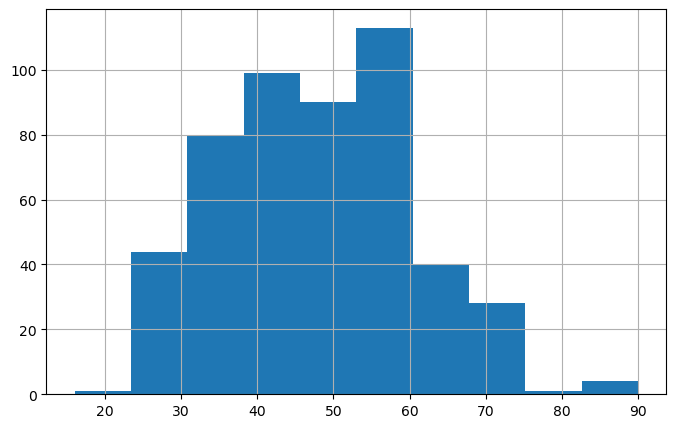

In [6]:
# Plot 
df['idade'].hist(figsize = (8,5), bins = 10) 
plt.show()

## Exploring Categorical Variables

In [7]:
df.describe(include = ['object'])

,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
count,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Masculino,Sim,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao
freq,314,251,272,290,296,270,386,273,256,376,269,283,310,329,415


## Categorical Columns x Variable Target(Result)

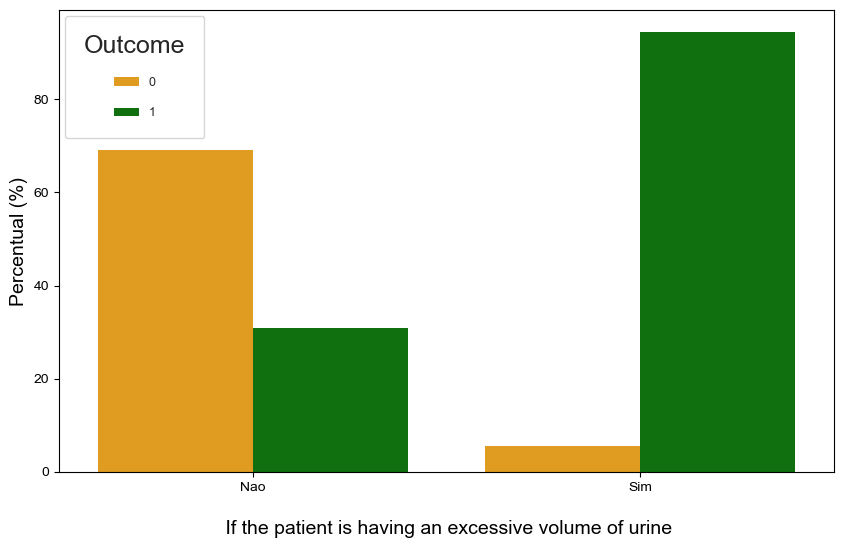

In [8]:
df_group1 = df.groupby(['Resultado', 'poliúria']).agg({'id' : 'nunique'}).reset_index()
df_group2 = df.groupby('poliúria').agg({'id' : 'nunique'}).reset_index() 
df_group3 = df_group1.merge(df_group2, on = 'poliúria')
df_group3['Percentual(%)'] = df_group3['id_x'] / df_group3['id_y'] * 100
df_group3.columns = ['Diabetes Outcome', 
                     'Poliúria', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']

plt.figure(figsize = (10,6))

chart = sns.barplot(x = 'Poliúria', 
                    y = 'Percentual(%)', 
                    data = df_group3, 
                    hue = 'Diabetes Outcome',
                    palette = ["orange","green"])


sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n If the patient is having an excessive volume of urine", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)


plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Outcome')


chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)


chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);

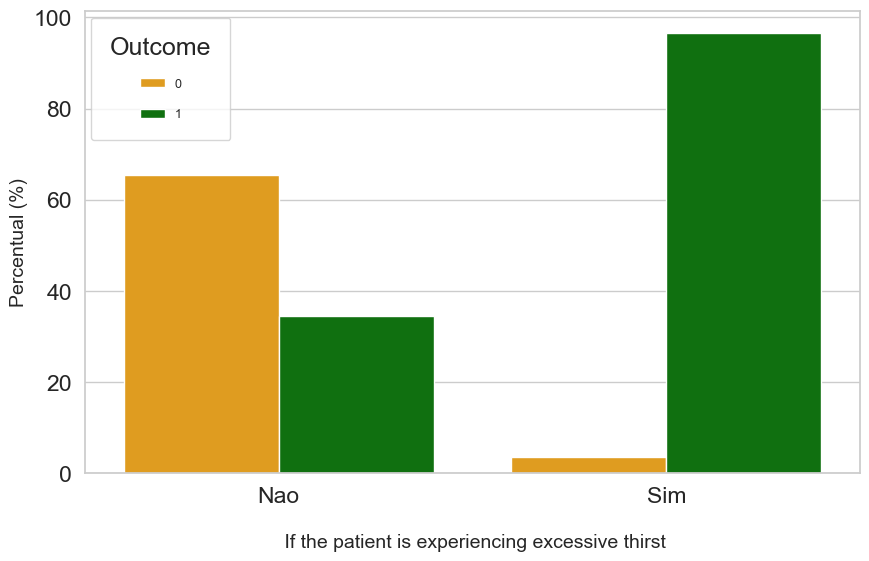

In [9]:
df_group4 = df.groupby(['Resultado', 'polidipsia']).agg({'id' : 'nunique'}).reset_index()
df_group5 = df.groupby('polidipsia').agg({'id' : 'nunique'}).reset_index() 
df_group6 = df_group4.merge(df_group5, on = 'polidipsia')
df_group6['Percentual(%)'] = df_group6['id_x'] / df_group6['id_y'] * 100
df_group6.columns = ['Diabetes Outcome', 
                     'polidipsia', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'polidipsia', 
                    y = 'Percentual(%)', 
                    data = df_group6, 
                    hue = 'Diabetes Outcome',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n If the patient is experiencing excessive thirst", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Outcome')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);


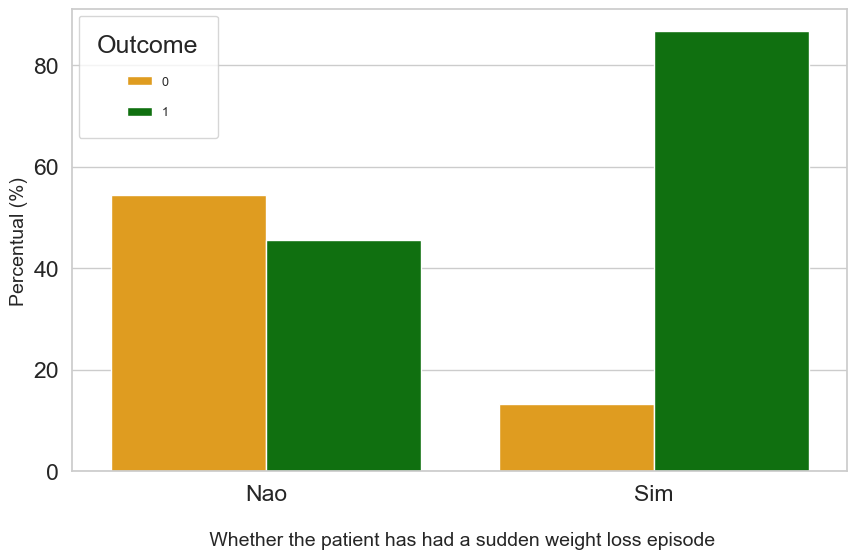

In [10]:
df_group7 = df.groupby(['Resultado', 'Perda_peso_repentina']).agg({'id' : 'nunique'}).reset_index()
df_group8 = df.groupby('Perda_peso_repentina').agg({'id' : 'nunique'}).reset_index() 
df_group9 = df_group7.merge(df_group8, on = 'Perda_peso_repentina')
df_group9['Percentual(%)'] = df_group9['id_x'] / df_group9['id_y'] * 100
df_group9.columns = ['Diabetes Outcome', 
                     'Perda_peso_repentina', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'Perda_peso_repentina', 
                    y = 'Percentual(%)', 
                    data = df_group9, 
                    hue = 'Diabetes Outcome',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n Whether the patient has had a sudden weight loss episode", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Outcome')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);


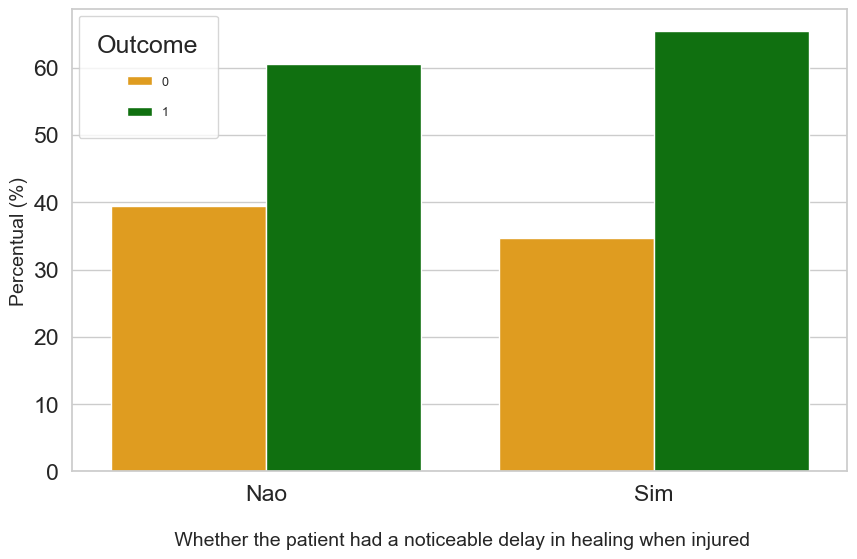

In [11]:
df_group10 = df.groupby(['Resultado', 'cura_atrasada']).agg({'id' : 'nunique'}).reset_index()
df_group11 = df.groupby('cura_atrasada').agg({'id' : 'nunique'}).reset_index() 
df_group12 = df_group10.merge(df_group11, on = 'cura_atrasada')
df_group12['Percentual(%)'] = df_group12['id_x'] / df_group12['id_y'] * 100
df_group12.columns = ['Diabetes Outcome', 
                     'cura_atrasada', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'cura_atrasada', 
                    y = 'Percentual(%)', 
                    data = df_group12, 
                    hue = 'Diabetes Outcome',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n Whether the patient had a noticeable delay in healing when injured", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Outcome')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);


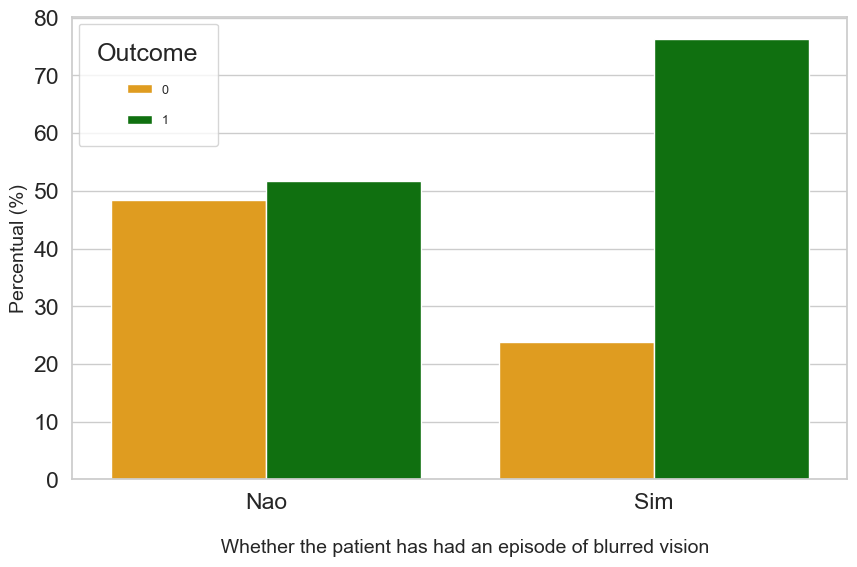

In [12]:
df_group13 = df.groupby(['Resultado', 'desfoque_visual']).agg({'id' : 'nunique'}).reset_index()
df_group14 = df.groupby('desfoque_visual').agg({'id' : 'nunique'}).reset_index() 
df_group15 = df_group13.merge(df_group14, on = 'desfoque_visual')
df_group15['Percentual(%)'] = df_group15['id_x'] / df_group15['id_y'] * 100
df_group15.columns = ['Diabetes Outcome', 
                     'desfoque_visual', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'desfoque_visual', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Diabetes Outcome',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n  Whether the patient has had an episode of blurred vision", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Outcome')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);

In [13]:
df['Faixa_Etaria'] = np.where(
        (df['idade'] >= 16) & (df['idade'] < 36 ), "16-35", 
    np.where(
        (df['idade'] >= 36) & (df['idade'] < 51 ),"36-50", 
    np.where(
        (df['idade'] >= 51) &  (df['idade'] < 91 ), "51-90" , 'x')))

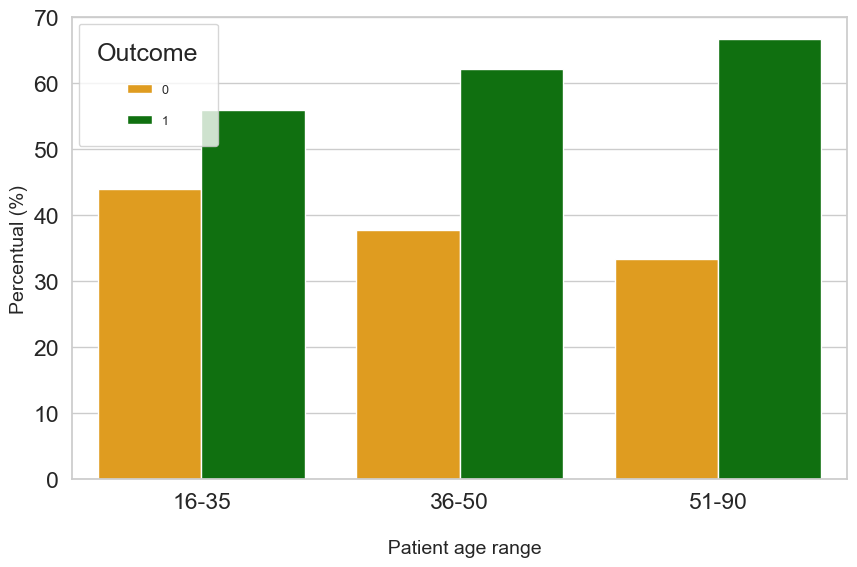

In [14]:
df_group16 = df.groupby(['Resultado', 'Faixa_Etaria']).agg({'id' : 'nunique'}).reset_index()
df_group17 = df.groupby('Faixa_Etaria').agg({'id' : 'nunique'}).reset_index() 
df_group18 = df_group16.merge(df_group17, on = 'Faixa_Etaria')
df_group18['Percentual(%)'] = df_group18['id_x'] / df_group18['id_y'] * 100
df_group18.columns = ['Resultado de Diabetes', 
                     'Faixa_Etaria', 
                     'Total Por Resultado', 
                     'Total Geral', 
                     'Percentual(%)']
# Tamanho da figura
plt.figure(figsize = (10,6))

# Chart
chart = sns.barplot(x = 'Faixa_Etaria', 
                    y = 'Percentual(%)', 
                    data = df_group18, 
                    hue = 'Resultado de Diabetes',
                    palette = ["orange","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\n  Patient age range", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 9, 
           title = 'Outcome')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = '',
           fontsize = 16, 
           alpha = .85);

# From the graphs illustrated above we can see that:

* *89%* of patients who reported having *excessive urine volume* were diagnosed with diabetes.
* *95%* of patients who reported having *excessive thirst* were diagnosed with diabetes.
* *84%* of patients who presented with a *sudden weight loss episode* were diagnosed with diabetes.
* *63%* of patients who reported having *a delayed healing noted when injured* were diagnosed with diabetes.
* *75%* of patients who reported having *an episode of blurred vision* were diagnosed with diabetes.
* *68%* of patients who are in the age group of *51-90* years have been diagnosed with diabetes.
* *62%* of patients who are in the age group of *36-50* years have been diagnosed with diabetes.
* *55%* of patients who are in the age group of *16-35* years have been diagnosed with diabetes.

## <font color='blue'> Pre-Processing Data for Building Machine Learning Models </font>

In [15]:
df.columns

Index(['id', 'idade', 'genero', 'poliúria', 'polidipsia',
       'Perda_peso_repentina', 'fraqueza', 'polifagia', 'candidiase_genital',
       'desfoque_visual', 'coceira', 'irritabilidade', 'cura_atrasada',
       'partial_paresis', 'rigidez_muscular', 'calvicie', 'obesidade',
       'Resultado', 'Faixa_Etaria'],
      dtype='object')

### Transforming categorical variable values ​​to numerical values

In [16]:
df['genero'] = np.where(
        (df['genero'] == 'Masculino'), 1, 
    np.where(
        (df['genero'] == 'Femenino'), 0 , 'x'))

In [17]:
df['poliúria'] = np.where(
        (df['poliúria'] == 'Sim'), 1, 
    np.where(
        (df['poliúria'] == 'Nao'), 0 , 'x'))

In [18]:
df['polidipsia'] = np.where(
        (df['polidipsia'] == 'Sim'), 1, 
    np.where(
        (df['polidipsia'] == 'Nao'), 0 , 'x'))

In [19]:
df['Perda_peso_repentina'] = np.where(
        (df['Perda_peso_repentina'] == 'Sim'), 1, 
    np.where(
        (df['Perda_peso_repentina'] == 'Nao'), 0 , 'x'))

In [20]:
df['fraqueza'] = np.where(
        (df['fraqueza'] == 'Sim'), 1, 
    np.where(
        (df['fraqueza'] == 'Nao'), 0 , 'x'))

In [21]:
df['polifagia'] = np.where(
        (df['polifagia'] == 'Sim'), 1, 
    np.where(
        (df['polifagia'] == 'Nao'), 0 , 'x'))

In [22]:
df['candidiase_genital'] = np.where(
        (df['candidiase_genital'] == 'Sim'), 1, 
    np.where(
        (df['candidiase_genital'] == 'Nao'), 0 , 'x'))

In [23]:
df['desfoque_visual'] = np.where(
        (df['desfoque_visual'] == 'Sim'), 1, 
    np.where(
        (df['desfoque_visual'] == 'Nao'), 0 , 'x'))

In [24]:
df['coceira'] = np.where(
        (df['coceira'] == 'Sim'), 1, 
    np.where(
        (df['coceira'] == 'Nao'), 0 , 'x'))

In [25]:
df['irritabilidade'] = np.where(
        (df['irritabilidade'] == 'Sim'), 1, 
    np.where(
        (df['irritabilidade'] == 'Nao'), 0 , 'x'))

In [26]:
df['cura_atrasada'] = np.where(
        (df['cura_atrasada'] == 'Sim'), 1, 
    np.where(
        (df['cura_atrasada'] == 'Nao'), 0 , 'x'))

In [27]:
df['partial_paresis'] = np.where(
        (df['partial_paresis'] == 'Sim'), 1, 
    np.where(
        (df['partial_paresis'] == 'Nao'), 0 , 'x'))

In [28]:
df['rigidez_muscular'] = np.where(
        (df['rigidez_muscular'] == 'Sim'), 1, 
    np.where(
        (df['rigidez_muscular'] == 'Nao'), 0 , 'x'))

In [29]:
df['calvicie'] = np.where(
        (df['calvicie'] == 'Sim'), 1, 
    np.where(
        (df['calvicie'] == 'Nao'), 0 , 'x'))

In [30]:
df['obesidade'] = np.where(
        (df['obesidade'] == 'Sim'), 1, 
    np.where(
        (df['obesidade'] == 'Nao'), 0 , 'x'))

In [31]:
df['genero'] = df['genero'].astype(int)
df['poliúria'] = df['poliúria'].astype(int)
df['polidipsia'] = df['polidipsia'].astype(int)
df['Perda_peso_repentina'] = df['Perda_peso_repentina'].astype(int)
df['fraqueza'] = df['fraqueza'].astype(int)
df['polifagia'] = df['polifagia'].astype(int)
df['candidiase_genital'] = df['candidiase_genital'].astype(int)
df['desfoque_visual'] = df['desfoque_visual'].astype(int)
df['coceira'] = df['coceira'].astype(int)
df['irritabilidade'] = df['irritabilidade'].astype(int)
df['cura_atrasada'] = df['cura_atrasada'].astype(int)
df['partial_paresis'] = df['partial_paresis'].astype(int)
df['rigidez_muscular'] = df['rigidez_muscular'].astype(int)
df['calvicie'] = df['calvicie'].astype(int)
df['obesidade'] = df['obesidade'].astype(int)

In [32]:
df.dtypes

id                       int64
idade                    int64
genero                   int32
poliúria                 int32
polidipsia               int32
Perda_peso_repentina     int32
fraqueza                 int32
polifagia                int32
candidiase_genital       int32
desfoque_visual          int32
coceira                  int32
irritabilidade           int32
cura_atrasada            int32
partial_paresis          int32
rigidez_muscular         int32
calvicie                 int32
obesidade                int32
Resultado                int64
Faixa_Etaria            object
dtype: object

# <font color='blue'> Feature Selection </font>

### Eliminating the variables that will not be used in the creation of the Predictive Model

In [33]:
df = df.drop('id', axis = 1)

In [34]:
df = df.drop('Faixa_Etaria', axis = 1)

In [35]:
df.head(10)

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade,Resultado
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


### <font color='blue'> Splitting the data into Training and Testing </font>

In [36]:
# Create a separate object for the target variable
y = df.Resultado

In [37]:
# Create a separate object for input variables
X = df.drop('Resultado', axis = 1)

In [38]:
# Split into training and test data with stratified sampling
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = df.Resultado)

In [39]:
len(X_treino)

375

In [40]:
len(X_teste)

125

In [41]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(375, 16) (125, 16) (375,) (125,)


In [42]:
y_treino.value_counts()

1    235
0    140
Name: Resultado, dtype: int64

### <font color='blue'> Data Standardization </font>

In [43]:
X_treino.head()

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
271,57,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0
469,47,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
385,38,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1
392,56,1,0,0,1,1,1,0,1,1,0,1,0,1,1,0
204,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Calculate mean and standard deviation of training data

In [44]:
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

idade                   47.557333
genero                   0.621333
poliúria                 0.506667
polidipsia               0.456000
Perda_peso_repentina     0.408000
fraqueza                 0.592000
polifagia                0.445333
candidiase_genital       0.208000
desfoque_visual          0.461333
coceira                  0.469333
irritabilidade           0.245333
cura_atrasada            0.437333
partial_paresis          0.442667
rigidez_muscular         0.378667
calvicie                 0.344000
obesidade                0.176000
dtype: float64
idade                   11.931457
genero                   0.485703
poliúria                 0.500623
polidipsia               0.498726
Perda_peso_repentina     0.492120
fraqueza                 0.492120
polifagia                0.497667
candidiase_genital       0.406419
desfoque_visual          0.499169
coceira                  0.499725
irritabilidade           0.430860
cura_atrasada            0.496720
partial_paresis          0.497366

### Standardization: Putting the data on the same scale

In [45]:
X_treino = (X_treino - treino_mean) / treino_std

In [46]:
X_treino.head()

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
271,0.791409,0.779626,0.985438,1.09078,1.202959,0.829067,1.114535,-0.511787,1.079128,-0.939182,-0.569404,-0.880442,1.120571,-0.779626,-0.723182,-0.461544
469,-0.046711,0.779626,-1.012071,-0.91433,-0.829067,-1.202959,-0.894843,-0.511787,-0.924203,1.061917,-0.569404,-0.880442,-0.890023,-0.779626,1.379091,-0.461544
385,-0.801020,0.779626,0.985438,-0.91433,-0.829067,-1.202959,-0.894843,1.948727,-0.924203,1.061917,-0.569404,-0.880442,-0.890023,1.279246,-0.723182,2.160864
392,0.707597,0.779626,-1.012071,-0.91433,1.202959,0.829067,1.114535,-0.511787,1.079128,1.061917,-0.569404,1.132764,-0.890023,1.279246,1.379091,-0.461544
204,-1.471516,0.779626,-1.012071,-0.91433,-0.829067,-1.202959,-0.894843,-0.511787,-0.924203,-0.939182,-0.569404,-0.880442,-0.890023,-0.779626,-0.723182,-0.461544


In [47]:
X_treino.describe()

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
count,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02,3.750000e+02
mean,9.000208e-17,7.401487e-17,-1.382598e-16,-6.987004e-17,1.622406e-16,-2.427688e-17,4.766558e-17,-1.894781e-17,2.948752e-16,-1.065814e-17,-1.480297e-18,-9.621933e-17,1.693460e-16,-1.373716e-16,-4.440892e-17,-1.435888e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.644885e+00,-1.279246e+00,-1.012071e+00,-9.143304e-01,-8.290666e-01,-1.202959e+00,-8.948428e-01,-5.117870e-01,-9.242033e-01,-9.391824e-01,-5.694045e-01,-8.804422e-01,-8.900227e-01,-7.796261e-01,-7.231818e-01,-4.615438e-01
25%,-7.172077e-01,-1.279246e+00,-1.012071e+00,-9.143304e-01,-8.290666e-01,-1.202959e+00,-8.948428e-01,-5.117870e-01,-9.242033e-01,-9.391824e-01,-5.694045e-01,-8.804422e-01,-8.900227e-01,-7.796261e-01,-7.231818e-01,-4.615438e-01
50%,-4.671125e-02,7.796261e-01,9.854378e-01,-9.143304e-01,-8.290666e-01,8.290666e-01,-8.948428e-01,-5.117870e-01,-9.242033e-01,-9.391824e-01,-5.694045e-01,-8.804422e-01,-8.900227e-01,-7.796261e-01,-7.231818e-01,-4.615438e-01
75%,6.237852e-01,7.796261e-01,9.854378e-01,1.090780e+00,1.202959e+00,8.290666e-01,1.114535e+00,-5.117870e-01,1.079128e+00,1.061917e+00,-5.694045e-01,1.132764e+00,1.120571e+00,1.279246e+00,1.379091e+00,-4.615438e-01
max,3.557207e+00,7.796261e-01,9.854378e-01,1.090780e+00,1.202959e+00,8.290666e-01,1.114535e+00,1.948727e+00,1.079128e+00,1.061917e+00,1.751538e+00,1.132764e+00,1.120571e+00,1.279246e+00,1.379091e+00,2.160864e+00


In [48]:
X_teste = (X_teste - treino_mean) / treino_std

In [49]:
X_teste.head()

,idade,genero,poliúria,polidipsia,Perda_peso_repentina,fraqueza,polifagia,candidiase_genital,desfoque_visual,coceira,irritabilidade,cura_atrasada,partial_paresis,rigidez_muscular,calvicie,obesidade
308,-1.136268,0.779626,-1.012071,-0.91433,-0.829067,-1.202959,-0.894843,-0.511787,-0.924203,-0.939182,-0.569404,-0.880442,-0.890023,-0.779626,-0.723182,-0.461544
322,1.378094,0.779626,-1.012071,-0.91433,-0.829067,0.829067,1.114535,-0.511787,1.079128,1.061917,1.751538,1.132764,-0.890023,1.279246,1.379091,-0.461544
3,-0.214335,0.779626,-1.012071,-0.91433,1.202959,0.829067,1.114535,1.948727,-0.924203,1.061917,-0.569404,1.132764,-0.890023,-0.779626,-0.723182,-0.461544
313,0.539973,0.779626,-1.012071,-0.91433,1.202959,0.829067,-0.894843,1.948727,-0.924203,-0.939182,-0.569404,1.132764,-0.890023,-0.779626,1.379091,-0.461544
461,-0.214335,0.779626,-1.012071,-0.91433,-0.829067,-1.202959,1.114535,1.948727,-0.924203,-0.939182,-0.569404,-0.880442,-0.890023,-0.779626,-0.723182,-0.461544


### <font color='blue'> Construction, Training and Evaluation of Model 1 with Logistic Regression (Benchmark) </font>

For the first version of the model, the ideal is to choose a simple, easy-to-understand algorithm that will be used as a benchmark.

Define list of hyperparameters

In [50]:
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

We will create the model with GridSearch, Several models will be created with different combinations of hyperparameters

In [51]:
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

model training

In [52]:
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [53]:
modelo_v1.best_estimator_

LogisticRegression(C=0.1)

In [54]:
y_pred_v1 = modelo_v1.predict(X_teste)

Shows the first 10 predictions

In [55]:
y_pred_v1[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

We get predictions in probability format for each class

In [56]:
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [57]:
y_pred_proba_v1[:10]

array([[0.8792223 , 0.1207777 ],
       [0.86815056, 0.13184944],
       [0.73761874, 0.26238126],
       [0.80163337, 0.19836663],
       [0.58877337, 0.41122663],
       [0.96667096, 0.03332904],
       [0.00804371, 0.99195629],
       [0.96335072, 0.03664928],
       [0.26310302, 0.73689698],
       [0.02474842, 0.97525158]])

We get the predictions in probability format by filtering for the positive class,
We need this to calculate the ROC Curve

In [58]:
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

Shows the first 10 predictions

In [59]:
y_pred_proba_v1[:10]

array([0.1207777 , 0.13184944, 0.26238126, 0.19836663, 0.41122663,
       0.03332904, 0.99195629, 0.03664928, 0.73689698, 0.97525158])

confusion matrix

In [60]:
confusion_matrix(y_teste, y_pred_v1)

array([[45,  1],
       [ 8, 71]], dtype=int64)

Extracting each value from the CM

In [61]:
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [62]:
print(tn, fp, fn, tp)

45 1 8 71


Calculates the global AUC (Area Under The Curve) metric with real data and test predictions

In [63]:
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.9384975233902036


Calculates the ROC curve with test data and predictions

In [64]:
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

AUC under test

In [65]:
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.9518436984039627


Accuracy under test

In [66]:
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.928


### Feature Importance

Building the model again with the best hyperparameters, This is necessary as the final version must not have GridSearchCV

In [67]:
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [68]:
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [69]:
print("Most important variables for the result of model_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Most important variables for the result of model_v1:
--------------------------------------------------
polidipsia
genero
poliúria
irritabilidade
coceira
candidiase_genital
cura_atrasada
desfoque_visual
partial_paresis
polifagia
Perda_peso_repentina
idade
calvicie
rigidez_muscular
obesidade
fraqueza


Saving the model to disk

In [70]:
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

Creates a dataframe to receive metrics from each model

In [71]:
df_modelos = pd.DataFrame()

Dictionary with model_v1 metrics

In [72]:
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

Add the dict to the dataframe

In [73]:
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [74]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.938498,0.951844,0.928


### <font color='blue'> Construction, Training and Evaluation of Model 2 with Random Forest </font>

The objective now is to try to get a better model than version 1. I will try the Random Forest algorithm.

In [75]:
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [76]:
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [77]:
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [78]:
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=300)

In [79]:
y_pred_v2 = modelo_v2.predict(X_teste)

In [80]:
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [81]:
confusion_matrix(y_teste, y_pred_v2)

array([[44,  2],
       [ 5, 74]], dtype=int64)

In [82]:
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.9466152999449643


In [83]:
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [84]:
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.9939460649422124


In [85]:
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.944


### Feature Importance

In [86]:
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [87]:
indices = np.argsort(-modelo_v2.feature_importances_)
print("Most important variables for the v2_model result:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Most important variables for the v2_model result:
--------------------------------------------------
poliúria
polidipsia
genero
idade
Perda_peso_repentina
partial_paresis
calvicie
irritabilidade
polifagia
coceira
cura_atrasada
desfoque_visual
rigidez_muscular
fraqueza
obesidade
candidiase_genital


In [88]:
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl') 

In [89]:
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [90]:
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [91]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.938498,0.951844,0.928
1,modelo_v2,Random Forest,0.946615,0.993946,0.944


### <font color='blue'> Construction, Training and Evaluation of Model 3 with KNN </font>

Now I'm going to try a simpler algorithm, KNN. For this algorithm, I first need to define the value of K, which is the number of nearest neighbors.

In [92]:
vizinhos = list(range(1, 20, 2))

In [93]:
cv_scores = []

In [94]:
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())  

In [95]:
erro = [1 - x for x in cv_scores]

In [96]:
optimal_k = vizinhos[erro.index(min(erro))]
print('The optimal value of k is %d' % optimal_k)

The optimal value of k is 1


In [97]:
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [98]:
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [99]:
y_pred_v3 = modelo_v3.predict(X_teste)

In [100]:
confusion_matrix(y_teste, y_pred_v3)

array([[45,  1],
       [ 7, 72]], dtype=int64)

In [101]:
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [102]:
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.9448266373142542


In [103]:
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [104]:
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.9448266373142542


In [105]:
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.936


Note: With the KNN algorithm we did not extract the most important variables, because the concept of the algorithm is different.

In [106]:
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl') 

In [107]:
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [108]:
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [109]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.938498,0.951844,0.928
1,modelo_v2,Random Forest,0.946615,0.993946,0.944
2,modelo_v3,KNN,0.944827,0.944827,0.936


### <font color='blue'> Building, Training and Evaluating Model 4 with Decision Tree </font>

In version 4 of the model I will use a decision tree model.

In [110]:
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [111]:
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [112]:
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [113]:
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=3)

In [114]:
y_pred_v4 = modelo_v4.predict(X_teste)

In [115]:
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [116]:
confusion_matrix(y_teste, y_pred_v4)

array([[44,  2],
       [ 7, 72]], dtype=int64)

In [117]:
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.933957072096863


In [118]:
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [119]:
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.938084755090809


In [120]:
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.928


### Feature Importance

In [121]:
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [122]:
indices = np.argsort(-modelo_v4.feature_importances_)
print("Most important variables for the v4_model result:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Most important variables for the v4_model result:
--------------------------------------------------
poliúria
genero
polidipsia
idade
calvicie
irritabilidade
rigidez_muscular
cura_atrasada
Perda_peso_repentina
fraqueza
polifagia
candidiase_genital
desfoque_visual
coceira
partial_paresis
obesidade


In [123]:
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl') 

In [124]:
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [125]:
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [126]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.938498,0.951844,0.928
1,modelo_v2,Random Forest,0.946615,0.993946,0.944
2,modelo_v3,KNN,0.944827,0.944827,0.936
3,modelo_v4,Decision Tree,0.933957,0.938085,0.928


### <font color='blue'> Model 5 Construction, Training and Evaluation with SVM </font>

For the fifth and final version of the model I will use SVM.

In [127]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [128]:
svc_param_selection(X_treino, y_treino, 5)

{'C': 1, 'gamma': 0.1}

In [129]:
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [130]:
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [131]:
y_pred_v5 = modelo_v5.predict(X_teste)

In [132]:
confusion_matrix(y_teste, y_pred_v5)

array([[37,  9],
       [ 0, 79]], dtype=int64)

In [133]:
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [134]:
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.9021739130434783


In [135]:
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [136]:
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.9928453494771601


In [137]:
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.928


In [138]:
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl') 

In [139]:
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [140]:
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [141]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.938498,0.951844,0.928
1,modelo_v2,Random Forest,0.946615,0.993946,0.944
2,modelo_v3,KNN,0.944827,0.944827,0.936
3,modelo_v4,Decision Tree,0.933957,0.938085,0.928
4,modelo_v5,SVM,0.902174,0.992845,0.928


### <font color='blue'> Best model Selection </font>

I will use the model that had the highest Accuracy, as it is a global metric,
Accuracy is ideal for comparing models from different algorithms

In [142]:
df_melhor_modelo = df_modelos[df_modelos['Acurácia'] == df_modelos['Acurácia'].max()]

In [143]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
1,modelo_v2,Random Forest,0.946615,0.993946,0.944


# FIM